<a href="https://colab.research.google.com/github/vinayakkgarg/HybridLSTM_For_NIFTY_predictions/blob/main/_20_global_indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing the libraries

In [ ]:
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## 2. Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/stockDataset-Daily-20yrs
!ls
!rm -rf ./new_df.csv

/content/gdrive/MyDrive/stockDataset-Daily-20yrs
dax.csv  ftse.csv   nasdaq.csv	snp.csv       twse.csv
dji.csv  hsi.csv    nifty.csv	sti.csv       us_10.csv
dxy.csv  kospi.csv  nikkei.csv	tech-ind.csv  usdinr.csv


Reading the names of all dataframes into a list

In [ ]:
list_of_dfs = []
for x in os.listdir():
  list_of_dfs.append(x[:-4])

Storing all dataframes in a dictionary all_dfs

In [ ]:
all_dfs={}
for x in list_of_dfs:
  all_dfs[x] = pd.read_csv(x+'.csv',parse_dates=True)
  

## 3. Preprocessing data

Filtering useful columns out of all dfs

In [ ]:
for i in all_dfs.keys():
  
  print(i,all_dfs[i].columns)
  all_dfs[i]['Date'] = pd.to_datetime(all_dfs[i]['Date'])
  if('Close/Last' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Close/Last'])

  if('Close' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Close'])
  if('Price' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','Price'])
  if(' Close' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date',' Close'])
  if('INR' in all_dfs[i]):
    all_dfs[i] = all_dfs[i].filter(['Date','INR'])
  all_dfs[i].columns = ['Date',i]
  


dax Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
dji Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')
dxy Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
hsi Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
kospi Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
nasdaq Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
nifty Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')
nikkei Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
twse Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
usdinr Index(['Date', 'USD', 'INR'], dtype='object')
us_10 Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')
ftse Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')
sti 

Viewing the date format of all dfs

In [ ]:
for i in all_dfs.keys():
  print(i,all_dfs[i]['Date'])

dax 0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5432   2021-03-31
5433   2021-04-01
5434   2021-04-06
5435   2021-04-07
5436   2021-04-08
Name: Date, Length: 5437, dtype: datetime64[ns]
dji 0      2021-04-09
1      2021-04-08
2      2021-04-07
3      2021-04-06
4      2021-04-05
          ...    
5348   2000-01-07
5349   2000-01-06
5350   2000-01-05
5351   2000-01-04
5352   2000-01-03
Name: Date, Length: 5353, dtype: datetime64[ns]
dxy 0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
6525   2021-04-05
6526   2021-04-06
6527   2021-04-07
6528   2021-04-08
6529   2021-04-09
Name: Date, Length: 6530, dtype: datetime64[ns]
hsi 0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5317   2021-03-31
5318   2021-04-01
5319   2021-04-07
5320   2021-04-08
5321   2021-04-09
Name: Date, Length: 5322, dtype: datetime64[ns]


Viewing columns of all dfs

In [ ]:
for i in all_dfs.keys():
  print(i,all_dfs[i].columns)

dax Index(['Date', 'dax'], dtype='object')
dji Index(['Date', 'dji'], dtype='object')
dxy Index(['Date', 'dxy'], dtype='object')
hsi Index(['Date', 'hsi'], dtype='object')
kospi Index(['Date', 'kospi'], dtype='object')
nasdaq Index(['Date', 'nasdaq'], dtype='object')
nifty Index(['Date', 'nifty'], dtype='object')
nikkei Index(['Date', 'nikkei'], dtype='object')
twse Index(['Date', 'twse'], dtype='object')
usdinr Index(['Date', 'usdinr'], dtype='object')
us_10 Index(['Date', 'us_10'], dtype='object')
ftse Index(['Date', 'ftse'], dtype='object')
sti Index(['Date', 'sti'], dtype='object')
snp Index(['Date', 'snp'], dtype='object')
tech-ind Index(['Date', 'tech-ind'], dtype='object')


Separating NIFTY into a new_df

In [ ]:
new_df = pd.DataFrame(all_dfs['nifty'])

Merging all dfs using left join on basis of Nifty dates 

In [ ]:
for i in all_dfs:
  if(i!='nifty'):
    new_df = new_df.merge(all_dfs[i], on="Date", how = 'left')


## 4. Preparing data for LSTM

Drop date column as it is not a feature to train the LSTM on

In [ ]:
new_df_copy = new_df.drop(columns = 'Date')

Converting all columns values to float64

In [ ]:
# import numpy as np
# new_df_copy['dax'] = new_df_copy['dax'].str.replace(',','').astype(np.float64)
# new_df_copy['dji'] = new_df_copy['dji'].str.replace(',','').astype(np.float64)
# new_df_copy['twse'] = new_df_copy['twse'].str.replace(',','').astype(np.float64)


In [ ]:
print(new_df_copy.dtypes)
print("Number of days: {}".format(new_df_copy.shape[0]))

nifty       float64
dax         float64
dji         float64
dxy         float64
hsi         float64
kospi       float64
nasdaq      float64
nikkei      float64
twse        float64
usdinr      float64
us_10       float64
ftse        float64
sti         float64
snp         float64
tech-ind    float64
dtype: object
Number of days: 5293


### Handling NaN values

In [ ]:
print(new_df_copy.info())
print('\n')
print(new_df_copy.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5293 entries, 0 to 5292
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nifty     5293 non-null   float64
 1   dax       5170 non-null   float64
 2   dji       5117 non-null   float64
 3   dxy       5112 non-null   float64
 4   hsi       5024 non-null   float64
 5   kospi     5021 non-null   float64
 6   nasdaq    5115 non-null   float64
 7   nikkei    4943 non-null   float64
 8   twse      4979 non-null   float64
 9   usdinr    5293 non-null   float64
 10  us_10     5201 non-null   float64
 11  ftse      5208 non-null   float64
 12  sti       5136 non-null   float64
 13  snp       5115 non-null   float64
 14  tech-ind  5293 non-null   float64
dtypes: float64(15)
memory usage: 661.6 KB
None


nifty         0
dax         123
dji         176
dxy         181
hsi         269
kospi       272
nasdaq      178
nikkei      350
twse        314
usdinr        0
us_10        92
ftse

1. Fill NaN values with mean

In [ ]:
# for i in new_df_copy.columns:
#   column_mean = new_df_copy[i].mean()
#   new_df_copy = new_df_copy.fillna(column_mean)

2. Fill NaN values with padding

In [ ]:
new_df_copy = new_df_copy.fillna(method ='pad') # filling the missing values with previous ones 
print (new_df_copy.isnull().sum())

nifty       0
dax         1
dji         0
dxy         0
hsi         0
kospi       0
nasdaq      0
nikkei      0
twse        0
usdinr      0
us_10       0
ftse        0
sti         0
snp         0
tech-ind    0
dtype: int64


In [ ]:
# Drop first row of dataframe
new_df_copy = new_df_copy.drop(axis=0,index=0)

In [ ]:
new_df_copy

,nifty,dax,dji,dxy,hsi,kospi,nasdaq,nikkei,twse,usdinr,us_10,ftse,sti,snp,tech-ind
1,14873.80,15202.679688,33503.57,92.059998,29008.070313,3143.260010,13829.309570,29708.980469,16926.439453,74.6134,1.626,6942.22,3186.40,4097.17,14873.80
2,14819.05,15176.360352,33446.26,92.459999,28674.800781,3137.409912,13688.839844,29730.789063,16815.359375,74.3584,1.679,6885.32,3195.76,4079.95,14819.05
3,14683.50,15212.679688,33430.24,92.339996,28674.800781,3127.080078,13698.379883,29696.630859,16815.359375,73.3999,1.658,6823.55,3207.63,4073.94,14683.50
4,14637.80,15212.679688,33527.19,92.599998,28674.800781,3120.830078,13705.589844,30089.250000,16815.359375,73.4101,1.707,6737.30,3209.74,4077.91,14637.80
5,14867.35,15107.169922,33153.21,92.930000,28938.740234,3087.399902,13480.110352,29388.869141,16571.279297,73.4101,1.673,6737.30,3181.68,4019.87,14867.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,1613.30,6780.959961,11522.56,100.800003,15405.629883,948.650024,3882.620117,18193.410156,8849.870117,0.0000,6.513,6504.75,2449.96,1441.47,1613.30
5289,1617.60,6474.919922,11253.26,100.650002,15153.230469,960.789978,3727.129883,18168.269531,8922.030273,0.0000,6.540,6447.24,2409.00,1403.45,1617.60
5290,1595.80,6502.069824,11122.65,100.379997,15846.719727,986.309998,3877.540039,18542.550781,8849.870117,0.0000,6.599,6535.90,2425.90,1402.11,1595.80
5291,1638.70,6586.950195,10997.93,100.410004,17072.820313,1059.040039,3901.689941,19002.859375,8756.549805,0.0000,6.499,6665.86,2549.01,1399.42,1638.70


In [ ]:
new_df_copy = new_df_copy.reindex(index=new_df_copy.index[::-1])

In [ ]:
new_df_copy

,nifty,dax,dji,dxy,hsi,kospi,nasdaq,nikkei,twse,usdinr,us_10,ftse,sti,snp,tech-ind
5292,1592.20,6750.759766,11357.51,100.220001,17369.630859,1059.040039,4131.149902,19002.859375,8756.549805,0.0000,6.594,6665.86,2608.48,1455.22,1592.20
5291,1638.70,6586.950195,10997.93,100.410004,17072.820313,1059.040039,3901.689941,19002.859375,8756.549805,0.0000,6.499,6665.86,2549.01,1399.42,1638.70
5290,1595.80,6502.069824,11122.65,100.379997,15846.719727,986.309998,3877.540039,18542.550781,8849.870117,0.0000,6.599,6535.90,2425.90,1402.11,1595.80
5289,1617.60,6474.919922,11253.26,100.650002,15153.230469,960.789978,3727.129883,18168.269531,8922.030273,0.0000,6.540,6447.24,2409.00,1403.45,1617.60
5288,1613.30,6780.959961,11522.56,100.800003,15405.629883,948.650024,3882.620117,18193.410156,8849.870117,0.0000,6.513,6504.75,2449.96,1441.47,1613.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,14867.35,15107.169922,33153.21,92.930000,28938.740234,3087.399902,13480.110352,29388.869141,16571.279297,73.4101,1.673,6737.30,3181.68,4019.87,14867.35
4,14637.80,15212.679688,33527.19,92.599998,28674.800781,3120.830078,13705.589844,30089.250000,16815.359375,73.4101,1.707,6737.30,3209.74,4077.91,14637.80
3,14683.50,15212.679688,33430.24,92.339996,28674.800781,3127.080078,13698.379883,29696.630859,16815.359375,73.3999,1.658,6823.55,3207.63,4073.94,14683.50
2,14819.05,15176.360352,33446.26,92.459999,28674.800781,3137.409912,13688.839844,29730.789063,16815.359375,74.3584,1.679,6885.32,3195.76,4079.95,14819.05


### Normalising the Data

1. Using MinMax Scaler for Normalisation

In [ ]:
X = new_df_copy.values
X =X[:,:-1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
df = pd.DataFrame(X)
print(X)
print('\n')
print(X.shape)

[[0.05103558 0.34956939 0.17829633 ... 0.73606061 0.54039333 0.22764453]
 [0.05425124 0.33697807 0.16496875 ... 0.73606061 0.51803905 0.2113318 ]
 [0.05128453 0.33045369 0.16959141 ... 0.70774942 0.47176301 0.2121182 ]
 ...
 [0.95635006 1.         0.99640662 ... 0.77041266 0.76560891 0.99320887]
 [0.96572387 0.99720829 0.99700039 ... 0.78386898 0.76114707 0.99496585]
 [0.96951004 0.99923134 0.99912454 ... 0.79626439 0.75762872 1.        ]]


(5292, 14)


2. Using StandardScaler for Normalisation

In [ ]:
# x = new_df_copy.values #returns a numpy array
# standardScaler = preprocessing.StandardScaler()
# x_scaled = standardScaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)


In [ ]:
print(df)

            0         1         2   ...        11        12        13
0     0.051036  0.349569  0.178296  ...  0.736061  0.540393  0.227645
1     0.054251  0.336978  0.164969  ...  0.736061  0.518039  0.211332
2     0.051285  0.330454  0.169591  ...  0.707749  0.471763  0.212118
3     0.052792  0.328367  0.174432  ...  0.688435  0.465410  0.212510
4     0.052495  0.351891  0.184414  ...  0.700964  0.480807  0.223625
...        ...       ...       ...  ...       ...       ...       ...
5287  0.969064  0.991890  0.986139  ...  0.751623  0.755855  0.977402
5288  0.953190  1.000000  1.000000  ...  0.751623  0.766402  0.994369
5289  0.956350  1.000000  0.996407  ...  0.770413  0.765609  0.993209
5290  0.965724  0.997208  0.997000  ...  0.783869  0.761147  0.994966
5291  0.969510  0.999231  0.999125  ...  0.796264  0.757629  1.000000

[5292 rows x 14 columns]


In [ ]:
new_normalised_df_with_date = pd.concat((new_df['Date'],df),axis=1)

In [ ]:
new_normalised_df_without_date = new_normalised_df_with_date.drop(columns = 'Date')

In [ ]:
for col in new_normalised_df_without_date.columns:
  new_normalised_df_without_date[col].fillna(value=new_normalised_df_without_date[col].mean(), inplace=True)

In [ ]:
new_normalised_df_without_date

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.051036,0.349569,0.178296,0.582812,0.364878,0.215413,0.232413,0.509664,0.393933,0.000000,0.968780,0.736061,0.540393,0.227645
1,0.054251,0.336978,0.164969,0.586645,0.352791,0.215413,0.214737,0.509664,0.393933,0.000000,0.953648,0.736061,0.518039,0.211332
2,0.051285,0.330454,0.169591,0.586040,0.302864,0.188871,0.212877,0.489978,0.400856,0.000000,0.969576,0.707749,0.471763,0.212118
3,0.052792,0.328367,0.174432,0.591487,0.274626,0.179558,0.201290,0.473970,0.406209,0.000000,0.960178,0.688435,0.465410,0.212510
4,0.052495,0.351891,0.184414,0.594513,0.284903,0.175128,0.213268,0.475045,0.400856,0.000000,0.955878,0.700964,0.480807,0.223625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,0.953190,1.000000,1.000000,0.429090,0.825226,0.967828,0.969966,0.983812,0.991760,0.954166,0.190347,0.751623,0.766402,0.994369
5289,0.956350,1.000000,0.996407,0.423845,0.825226,0.970108,0.969411,0.967020,0.991760,0.954033,0.182542,0.770413,0.765609,0.993209
5290,0.965724,0.997208,0.997000,0.426266,0.825226,0.973878,0.968676,0.968481,0.991760,0.966492,0.185887,0.783869,0.761147,0.994966
5291,0.969510,0.999231,0.999125,0.418196,0.838796,0.976013,0.979497,0.967549,1.000000,0.969806,0.177445,0.796264,0.757629,1.000000


In [ ]:
final_data = new_normalised_df_without_date.values

In [ ]:
final_data

array([[0.05103558, 0.34956939, 0.17829633, ..., 0.73606061, 0.54039333,
        0.22764453],
       [0.05425124, 0.33697807, 0.16496875, ..., 0.73606061, 0.51803905,
        0.2113318 ],
       [0.05128453, 0.33045369, 0.16959141, ..., 0.70774942, 0.47176301,
        0.2121182 ],
       ...,
       [0.96572387, 0.99720829, 0.99700039, ..., 0.78386898, 0.76114707,
        0.99496585],
       [0.96951004, 0.99923134, 0.99912454, ..., 0.79626439, 0.75762872,
        1.        ],
       [0.32305122, 0.42613159, 0.30773973, ..., 0.57110387, 0.55368417,
        0.29316463]])

In [ ]:
X = final_data[:int(0.8*final_data.shape[0]),:]

In [ ]:
X_test = final_data[int(0.8*final_data.shape[0]):,:]

In [ ]:
print(X.shape, X_test.shape)

(4234, 14) (1059, 14)


In [ ]:
print(X)

[[0.05103558 0.34956939 0.17829633 ... 0.73606061 0.54039333 0.22764453]
 [0.05425124 0.33697807 0.16496875 ... 0.73606061 0.51803905 0.2113318 ]
 [0.05128453 0.33045369 0.16959141 ... 0.70774942 0.47176301 0.2121182 ]
 ...
 [0.49643166 0.71248885 0.49658712 ... 0.82370202 0.64462061 0.4655123 ]
 [0.49656997 0.71270023 0.49245964 ... 0.83196054 0.6493343  0.45996948]
 [0.5013243  0.71086004 0.49194445 ... 0.83504959 0.64589489 0.45977653]]


In [ ]:
# shaping data from neural network
X_train = []
y_train = []
for i in range(60, X.shape[0]):
  X_train.append(X[i-60:i,1:])
  y_train.append(X[i,0])
  if i <= 61:
    print(X_train)
    print('\n')
    print(y_train)
    print()

[array([[0.34956939, 0.17829633, 0.58281216, 0.36487762, 0.21541259,
        0.23241324, 0.50966437, 0.39393317, 0.        , 0.96877987,
        0.73606061, 0.54039333, 0.22764453],
       [0.33697807, 0.16496875, 0.58664519, 0.35279146, 0.21541259,
        0.21473713, 0.50966437, 0.39393317, 0.        , 0.95364766,
        0.73606061, 0.51803905, 0.2113318 ],
       [0.33045369, 0.16959141, 0.58603984, 0.30286449, 0.188871  ,
        0.21287678, 0.48997768, 0.40085595, 0.        , 0.9695763 ,
        0.70774942, 0.47176301, 0.2121182 ],
       [0.32836679, 0.17443238, 0.59148679, 0.27462552, 0.17955791,
        0.20129015, 0.47397025, 0.406209  , 0.        , 0.9601784 ,
        0.68843524, 0.46541044, 0.21250994],
       [0.35189075, 0.18441379, 0.59451283, 0.28490325, 0.17512764,
        0.21326812, 0.47504547, 0.40085595, 0.        , 0.95587767,
        0.70096353, 0.48080696, 0.22362482],
       [0.36300244, 0.18625367, 0.59834569, 0.30292274, 0.18921039,
        0.22613655, 0.5031

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape

(4174, 60, 13)

In [ ]:
look_back = X[-60:]

data = np.concatenate((look_back,X_test),axis=0)
inputs = data

In [ ]:
print(inputs.shape)

(1119, 14)


In [ ]:
X_test = []
y_test = []
for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i,1:])
  y_test.append(inputs[i,0])
  if i <= 61:
    print(X_test)
    print('\n')
    print(y_test)
    print()

[array([[0.64695094, 0.43073905, 0.50010089, 0.62222102, 0.57882007,
        0.32165738, 0.41269934, 0.43334064, 0.86415013, 0.18763938,
        0.82504613, 0.64419961, 0.43090182],
       [0.64435057, 0.43491175, 0.5003025 , 0.62624706, 0.57814125,
        0.32368797, 0.41627435, 0.4321916 , 0.86529783, 0.19018796,
        0.81609486, 0.64312832, 0.43360307],
       [0.64304536, 0.43444734, 0.51099459, 0.63293288, 0.58262994,
        0.32298158, 0.41968981, 0.43308396, 0.86742166, 0.19544441,
        0.80884278, 0.64441763, 0.43390711],
       [0.63705449, 0.43340917, 0.50817016, 0.62883319, 0.57843322,
        0.32186843, 0.41802143, 0.43171158, 0.86702783, 0.19289583,
        0.81852166, 0.64066623, 0.43185193],
       [0.64729451, 0.43669121, 0.52834366, 0.59542153, 0.57953532,
        0.32466244, 0.41434977, 0.42825171, 0.86456606, 0.19958586,
        0.83009143, 0.63878677, 0.43475198],
       [0.63115198, 0.42816272, 0.52834366, 0.59542153, 0.56443435,
        0.31577741, 0.4143

In [ ]:
print(y_train)

[0.04808271 0.04662702 0.04706269 ... 0.49643166 0.49656997 0.5013243 ]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

reduceLROnPlato = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, verbose=1, mode='min')
earlyStop = EarlyStopping(monitor="val_loss", mode='min', verbose=1, patience=8)

model 1

In [ ]:
#create model
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units = 60, return_sequences = True, 
                                   input_shape = (X_train.shape[1],X_train.shape[2])))
# model_lstm.add(tf.keras.layers.LSTM(units = 60,return_sequences = True))
# model_lstm.add(tf.keras.layers.LSTM(units = 30, return_sequences = True))
  
model_lstm.add(tf.keras.layers.Dense(units = 1))

model_lstm.compile(loss='mae', optimizer='adam')
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 60)            17760     
_________________________________________________________________
dense_2 (Dense)              (None, 60, 1)             61        
Total params: 17,821
Trainable params: 17,821
Non-trainable params: 0
_________________________________________________________________


model 2

In [ ]:
# model_lstm = tf.keras.Sequential()
# model_lstm.add(tf.keras.layers.LSTM(units = 128,return_sequences = True, 
#                                    input_shape = (X_train.shape[1], X_train.shape[2])))
# model_lstm.add(LSTM(64, return_sequences=False))
# model_lstm.add(Dense(25))
# model_lstm.add(Dense(1))

# model_lstm.compile(optimizer='adam', loss='mean_squared_error')
# model_lstm.summary()

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(4174, 60, 13) (4174,) (1059, 60, 13) (1059,)


In [ ]:
# fit network
history_lstm = model_lstm.fit(X_train, y_train, 
                              epochs = 100, 
                              batch_size = 64, 
                              validation_data = (X_test, y_test),  
                              shuffle=False,
                              callbacks=[reduceLROnPlato, earlyStop])

Epoch 1/100
66/66 [==============================] - 5s 46ms/step - loss: 0.0593 - val_loss: 0.1046
Epoch 2/100
66/66 [==============================] - 3s 40ms/step - loss: 0.0561 - val_loss: 0.1689
Epoch 3/100
66/66 [==============================] - 3s 40ms/step - loss: 0.0554 - val_loss: 0.1148
Epoch 4/100
66/66 [==============================] - 3s 39ms/step - loss: 0.0644 - val_loss: 0.1026
Epoch 5/100
66/66 [==============================] - 3s 40ms/step - loss: 0.0569 - val_loss: 0.0916
Epoch 6/100
66/66 [==============================] - 3s 39ms/step - loss: 0.0687 - val_loss: 0.0869
Epoch 7/100
66/66 [==============================] - 3s 39ms/step - loss: 0.0649 - val_loss: 0.0648
Epoch 8/100
66/66 [==============================] - 3s 40ms/step - loss: 0.0581 - val_loss: 0.0605
Epoch 9/100
66/66 [==============================] - 3s 39ms/step - loss: 0.0489 - val_loss: 0.0570
Epoch 10/100
66/66 [==============================] - 3s 40ms/step - loss: 0.0478 - val_loss: 0.0552

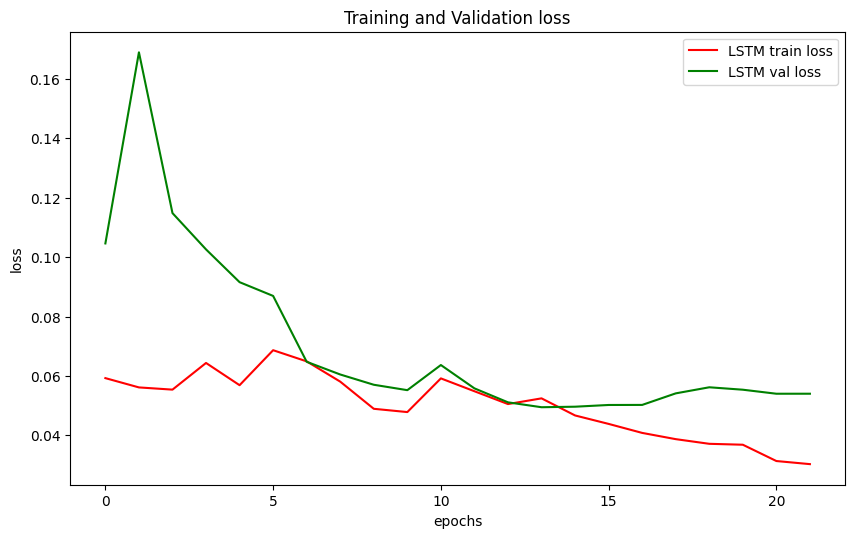

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(history_lstm.history['loss'], label='LSTM train loss', color='red')
plt.plot(history_lstm.history['val_loss'], label='LSTM val loss', color= 'green')
# plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
# plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and Validation loss')
plt.show()

In [ ]:
y_pred = model_lstm.predict(X_test)

In [ ]:
print(y_test.shape,y_pred.shape)

(1059,) (1059, 60, 1)


In [ ]:
import numpy as np
np.isnan(y_test)

array([False, False, False, ..., False, False, False])

In [ ]:
# normal_scale = 1/0.00143499
# normal_scale

In [ ]:
# y_pred = y_pred * normal_scale
# y_pred


In [ ]:
# y_test = y_test * normal_scale
# y_test 

## denormalizing

In [ ]:
def invTransform(scaler, data):
    dummy = pd.DataFrame(np.zeros((len(data), 14)))
    dummy[0] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=dummy.columns)
    return dummy[0].values

In [ ]:
y_pred[:,-1,-1].shape

(1059,)

In [ ]:
y_pred = invTransform(scaler, y_pred[:,-1,-1])
y_test = invTransform(scaler, y_test)

In [ ]:
y_pred, y_test

(array([ 8563.27109562,  8563.55897455,  8611.32101963, ...,
        14652.02338774, 14702.11173592, 14766.84829496]),
 array([ 8185.8       ,  8179.5       ,  8192.25      , ...,
        14819.05      , 14873.8       ,  5525.68214286]))

In [ ]:
mean_y_test = y_test.mean()
mean_y_pred = y_pred.mean()
print(mean_y_test, mean_y_pred)

10973.08223054094 11002.360936178016


In [ ]:
accuracy = round((mean_y_test / mean_y_pred)*100,2)
accuracy

99.73

In [ ]:
from math import sqrt
m = len(y_pred)
rmse = sqrt(mean_squared_error(y_pred,y_test,squared=False))

#RMSE


In [ ]:
rmse

26.656408152538056

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')

#MAE

In [ ]:
mae

array([502.37696957])

# R2

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print(r2)

0.7554723161722996


In [ ]:
y_train_pred = model_lstm.predict(X_train)
print(y_train.shape,y_train_pred.shape)


(4174,) (4174, 60, 1)


In [ ]:
import numpy as np
np.isnan(y_train)


array([False, False, False, ..., False, False, False])

In [ ]:
# normal_scale = 1/0.00143499
# normal_scale
# y_train_pred = y_train_pred * normal_scale
# y_train_pred


In [ ]:
# y_train = y_train * normal_scale
# y_train 


In [ ]:
y_train_pred.shape

(4174, 60, 1)

In [ ]:
y_train = invTransform(scaler,y_train)
y_train_pred = invTransform(scaler, y_train_pred[:,-1,-1])

In [ ]:
from math import sqrt
m = len(y_train_pred)
rmse = sqrt(mean_squared_error(y_train_pred,y_train,squared=False))
rmse

19.899356136909063

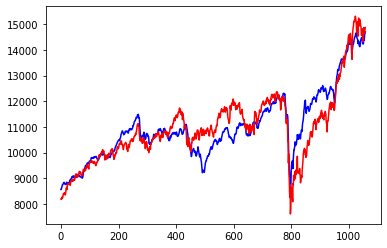

In [ ]:
# y_pred[2]
# plt.plot(y_test)
# y_pred = y_pred.reshape(1059,60)
# print(type(y_pred[:-2]))
# print(y_pred[:,0,-2].shape)
plt.plot(y_pred[:-1], c='b')
plt.plot(y_test[:-1], c='r')


# Adjusted R2

In [ ]:
n = 2518
p = 14
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adj_r2)

0.7541046023993919


RMSE of training data: 3.6755
RMSE of testing data: 4.5184

In [ ]:
# results = pd.read_csv('/content/gdrive/MyDrive/results.csv', index_col=[0])

In [ ]:
# results.describe()

In [ ]:
# len(y_pred)

In [ ]:
ypred = {"global20": y_pred}

In [ ]:
ypred

{'global20': array([ 8563.27109562,  8563.55897455,  8611.32101963, ...,
        14652.02338774, 14702.11173592, 14766.84829496])}

In [ ]:
# testdf = results.join(pd.DataFrame(ypred))

In [ ]:
testdf = pd.DataFrame(ypred)

In [ ]:
testdf.to_csv('/content/gdrive/MyDrive/global20.csv');